### Dependencies, includes, paths

In [1]:
import sys
import subprocess
import pkg_resources

required = {'numpy', 'pandas'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

import numpy as np
import pandas as pd

BASE_PATH    = 'C:/Users/pavel/github/SMSA/'
DATA_PATH    = f'{BASE_PATH}/data/NASDAQ-100/'
TICKERS_PATH = f'{BASE_PATH}/data/NASDAQ-100.csv'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors

### Data Import

In [2]:
import smsa
import smsa.data_import

tickers = smsa.data_import.read_tickers(TICKERS_PATH)
tickers = tickers[:20]
data_for_ticker = smsa.data_import.read_historical_data(tickers, DATA_PATH)

table = smsa.data_import.merge_table(data_for_ticker)
table = table.dropna(axis='columns')
table = smsa.data_import.table_logret(table)

logrets_mtx = table.loc[:, table.columns != 'Date']
logrets_mtx.drop(logrets_mtx.tail(52).index, inplace = True)
sample_size = logrets_mtx.shape[0]
print(f'sample_size: {sample_size}')

sample_size: 200


C:\Users\pavel\AppData\Local\Temp\ipykernel_12352\2780268439.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logrets_mtx.drop(logrets_mtx.tail(52).index, inplace = True)


## Mean, cov maximum likelihood estimations for the data

In [3]:
import smsa.pearson

mean = logrets_mtx.mean()
cov  = logrets_mtx.cov()

In [4]:
logrets_mtx.corr(method='pearson')

,AAPL,MSFT,GOOG,GOOGL,AMZN,TSLA,FB,NVDA,COST,PEP,NTES,AVGO,ASML,AZN,CSCO,CMCSA,ADBE,INTC,TMUS,TXN
AAPL,1.000000,0.719477,0.588542,0.596721,0.604433,0.489670,0.555431,0.552893,0.493510,0.364752,0.262539,0.623653,0.530375,0.162623,0.451065,0.288485,0.666081,0.403483,0.325125,0.493516
MSFT,0.719477,1.000000,0.693128,0.707233,0.609897,0.411964,0.547791,0.616106,0.494368,0.458429,0.218710,0.625232,0.593833,0.164051,0.473651,0.374137,0.753489,0.394750,0.413036,0.574815
GOOG,0.588542,0.693128,1.000000,0.974055,0.583503,0.359539,0.620091,0.488620,0.368304,0.349934,0.242656,0.535528,0.465177,0.061592,0.326004,0.332385,0.593822,0.360491,0.391866,0.465608
GOOGL,0.596721,0.707233,0.974055,1.000000,0.583920,0.357492,0.641477,0.516728,0.383539,0.352642,0.296273,0.562775,0.496866,0.077815,0.320060,0.315015,0.604643,0.368840,0.400143,0.493512
AMZN,0.604433,0.609897,0.583503,0.583920,1.000000,0.414015,0.542048,0.530795,0.386474,0.269744,0.229155,0.544339,0.425677,0.032830,0.227304,0.201748,0.619564,0.363567,0.323627,0.410404
TSLA,0.489670,0.411964,0.359539,0.357492,0.414015,1.000000,0.323621,0.470144,0.292242,0.032851,0.389298,0.518690,0.417666,0.130775,0.151402,0.132892,0.458155,0.360004,0.151118,0.470044
FB,0.555431,0.547791,0.620091,0.641477,0.542048,0.323621,1.000000,0.506397,0.420382,0.316897,0.268277,0.542278,0.418789,0.052703,0.244626,0.263446,0.574594,0.292768,0.314616,0.458268
NVDA,0.552893,0.616106,0.488620,0.516728,0.530795,0.470144,0.506397,1.000000,0.379249,0.163171,0.312949,0.708933,0.663713,0.077911,0.236379,0.215472,0.684532,0.457824,0.266715,0.630874
COST,0.493510,0.494368,0.368304,0.383539,0.386474,0.292242,0.420382,0.379249,1.000000,0.476724,0.024962,0.416168,0.370725,0.196148,0.402776,0.271459,0.530172,0.244898,0.238326,0.359936
PEP,0.364752,0.458429,0.349934,0.352642,0.269744,0.032851,0.316897,0.163171,0.476724,1.000000,0.042671,0.279316,0.228191,0.236953,0.461840,0.426156,0.423028,0.184714,0.388794,0.276741


## Statistical Modelling

### Data generation preview

In [5]:
import smsa.sampling

generated_logrets_mtx = smsa.sampling.generate_logrets_mtx(0.5, 252, mean, cov, logrets_mtx.columns)
generated_logrets_mtx

,AAPL,MSFT,GOOG,GOOGL,AMZN,TSLA,FB,NVDA,COST,PEP,NTES,AVGO,ASML,AZN,CSCO,CMCSA,ADBE,INTC,TMUS,TXN
0,0.007990,0.026827,0.016306,0.021091,0.019047,-0.029194,0.024563,0.018040,-0.005942,-0.011813,-0.013082,0.002252,-0.009368,-0.011277,-0.014285,-0.001271,0.024827,-0.030889,-0.023718,0.007123
1,-0.006769,-0.004128,0.010163,0.007133,0.012285,-0.011758,-0.018629,-0.057698,-0.017266,0.009576,-0.028208,-0.015365,0.002316,0.022071,0.004816,-0.012369,0.002699,-0.026909,0.034049,0.001067
2,-0.005040,0.011482,0.027883,0.027167,0.010442,0.007874,0.003293,0.038688,0.000514,-0.002024,0.013364,0.017941,0.032927,0.000390,0.003041,0.014063,0.009042,0.016159,0.002189,0.018267
3,0.001656,0.005329,0.020109,0.022190,0.007813,-0.022895,0.011321,0.033514,-0.008591,-0.008282,-0.017149,0.002746,-0.004159,-0.028805,-0.005146,0.021967,0.003250,0.024676,-0.000476,0.005914
4,0.001638,0.015702,0.006153,0.006289,0.018527,0.034885,-0.006045,0.017649,-0.001098,-0.002072,0.021060,-0.003999,0.026502,0.003145,0.001616,0.010556,0.028032,0.014052,0.014875,0.004549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.002438,-0.003689,-0.007378,-0.007432,-0.004301,-0.011399,0.012090,0.048365,0.020032,0.014293,-0.027859,0.030987,0.023688,-0.006864,0.025175,0.002211,0.012381,0.019603,-0.000615,0.029081
248,-0.023530,0.023468,0.027865,0.030562,-0.087687,0.057099,-0.019242,-0.087667,-0.017714,-0.010941,-0.027090,-0.038036,-0.045845,0.028658,0.024688,0.035567,-0.013674,-0.096290,0.072601,0.002134
249,0.020953,0.016362,0.011794,0.009174,0.002675,0.013435,0.024416,0.024929,0.009631,-0.006060,-0.034435,0.005813,0.023322,0.011326,0.003519,0.010133,0.016992,0.010188,0.002184,0.007565
250,0.012139,0.009187,-0.004003,-0.003717,0.001411,-0.027167,0.004799,0.018007,0.003346,-0.003097,0.031940,-0.011274,0.003807,0.003141,-0.012817,0.008093,-0.007834,-0.001706,0.002067,-0.001633


In [6]:
generated_logrets_mtx.corr(method='pearson')

,AAPL,MSFT,GOOG,GOOGL,AMZN,TSLA,FB,NVDA,COST,PEP,NTES,AVGO,ASML,AZN,CSCO,CMCSA,ADBE,INTC,TMUS,TXN
AAPL,1.000000,0.755976,0.555124,0.596429,0.636304,0.463757,0.614318,0.621656,0.290712,0.154459,-0.032211,0.690642,0.554857,0.104384,0.319714,0.037260,0.737226,0.361734,0.377280,0.577314
MSFT,0.755976,1.000000,0.623976,0.702326,0.786882,0.383432,0.696559,0.730963,-0.035916,-0.062139,-0.217571,0.795720,0.694272,0.107192,0.448948,-0.107147,0.876583,0.303066,0.508816,0.811369
GOOG,0.555124,0.623976,1.000000,0.940981,0.494682,0.253539,0.552214,0.390932,0.220925,0.245328,-0.056253,0.473437,0.382905,0.080399,0.298655,0.219199,0.528261,0.381261,0.408563,0.361080
GOOGL,0.596429,0.702326,0.940981,1.000000,0.582260,0.151482,0.646341,0.476890,0.034657,0.074721,-0.053045,0.577540,0.495247,0.102789,0.280554,-0.038941,0.580163,0.292115,0.301677,0.479768
AMZN,0.636304,0.786882,0.494682,0.582260,1.000000,0.276276,0.720242,0.718523,-0.180661,-0.257206,-0.264151,0.783163,0.611871,-0.053911,0.217727,-0.218313,0.800888,0.235727,0.386148,0.757007
TSLA,0.463757,0.383432,0.253539,0.151482,0.276276,1.000000,0.202681,0.370493,0.377328,0.134552,0.195042,0.363694,0.363122,0.037058,0.278135,0.369010,0.413505,0.411138,0.418615,0.394455
FB,0.614318,0.696559,0.552214,0.646341,0.720242,0.202681,1.000000,0.649446,-0.065607,-0.097917,-0.177783,0.708327,0.510020,-0.045879,0.208087,-0.182096,0.706615,0.221531,0.356346,0.646125
NVDA,0.621656,0.730963,0.390932,0.476890,0.718523,0.370493,0.649446,1.000000,-0.055442,-0.224153,-0.104171,0.785469,0.713957,-0.017863,0.243891,-0.166059,0.751954,0.390873,0.316264,0.763479
COST,0.290712,-0.035916,0.220925,0.034657,-0.180661,0.377328,-0.065607,-0.055442,1.000000,0.762876,0.156852,-0.084349,-0.083165,0.082906,0.193136,0.659286,0.058944,0.371557,0.275078,-0.219503
PEP,0.154459,-0.062139,0.245328,0.074721,-0.257206,0.134552,-0.097917,-0.224153,0.762876,1.000000,0.166150,-0.158607,-0.162903,0.136551,0.265838,0.667171,-0.000413,0.340382,0.310293,-0.284571


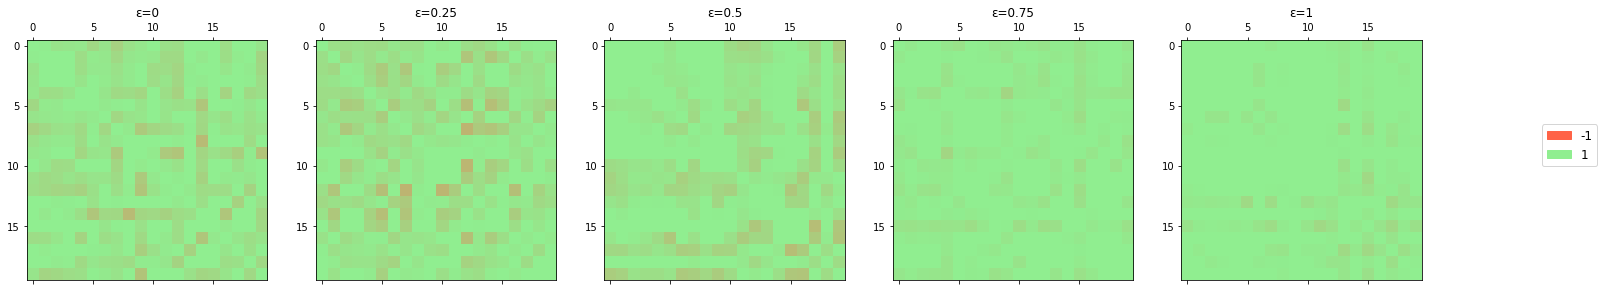

In [7]:
import smsa.plots

blending_params = [0, 0.25, 0.5, 0.75, 1]
plot_titles = [f'ε={bp}' for bp in blending_params]

true_corr = logrets_mtx.corr(method='pearson')
correlation_variation_mtxs = []

for bp in blending_params:
    generated_logrets_mtx = smsa.sampling.generate_logrets_mtx(bp, 252, mean, cov, logrets_mtx.columns)
    corr_diff = true_corr - generated_logrets_mtx.corr(method='pearson')
    correlation_variation_mtxs.append(corr_diff)

smsa.plots.plot_heatmaps(matrices=[correlation_variation_mtxs], titles=[plot_titles], figsize=(25, 10))


## Experiments

In [8]:
import smsa.pearson
import smsa.sign
import smsa.kendall
import smsa.experiments
import smsa.mtcs

from multiprocessing import Pool
from timeit import default_timer as timer

import itertools

testers = [smsa.pearson.CSTestPearson, smsa.sign.CSTestSign, smsa.kendall.CSTestKendall]
corrections = [None, smsa.mtcs.bonferroni, smsa.mtcs.holm, smsa.mtcs.hochberg, smsa.mtcs.benjamini]
blending_params=[x * 0.1 for x in range(0, 11)]
# thresholds=[0, 0.2, 0.4, 0.6, 1]
thresholds = [0.2, 0.4, 0.6]

tester_names = ['PRS', 'SGN', 'KND']
correction_names = ['BNF', 'HLM', 'HBG', 'BJM']
titles = [f'{cmb[0]} + {cmb[1]}' for cmb in itertools.product(tester_names, correction_names)]

significance_lvl = 0.1
iterations = 300
params = itertools.product(testers, corrections)
params = [p + (blending_params, thresholds, significance_lvl, logrets_mtx, iterations) for p in params]

recollect_results = False
# multiprocessing
if __name__ == "__main__":
    if recollect_results:
        pool = Pool(processes=6)
        results = pool.starmap(smsa.experiments.collect_mean_metrics, params)

        for df in results:
            df.to_csv(f'./experiments/{df.iloc[0, 0]}+{df.iloc[0, 1]}.csv')

### Asymptotic 

In [9]:
# import bigger logrets matrix
tickers = smsa.data_import.read_tickers(TICKERS_PATH)
tickers = tickers[:30]
data_for_ticker = smsa.data_import.read_historical_data(tickers, DATA_PATH)

table = smsa.data_import.merge_table(data_for_ticker)
table = table.dropna(axis='columns')
table = smsa.data_import.table_logret(table)

logrets_mtx = table.loc[:, table.columns != 'Date']
logrets_mtx.drop(logrets_mtx.tail(52).index, inplace = True)
sample_size = logrets_mtx.shape[0]
print(f'sample_size: {sample_size}')

sample_size: 200


C:\Users\pavel\AppData\Local\Temp\ipykernel_12352\2513851161.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logrets_mtx.drop(logrets_mtx.tail(52).index, inplace = True)


In [10]:
tester_names = ['PRS', 'SGN', 'KND']
correction_names = ['BNF', 'HLM', 'HBG', 'BJM']
titles = [f'{cmb[0]} + {cmb[1]}' for cmb in itertools.product(tester_names, correction_names)]

blending_param = 1

significance_lvl = 0.1
stepdown = 1
iterations = 300

params = itertools.product(testers, corrections)
params = [p + (blending_param, thresholds, significance_lvl, logrets_mtx, stepdown, iterations) for p in params]

recollect_results = False
# multiprocessing 
if __name__ == "__main__":
    if recollect_results:
        pool = Pool(processes=6)
        results = pool.starmap(smsa.experiments.collect_asymptotic_metrics, params)

        for df in results:
            df.to_csv(f'./experiments/asymptotic/{df.iloc[0, 0]}+{df.iloc[0, 1]}.csv')

### Read logs

In [11]:
import glob
files = glob.glob('./experiments/*.csv')

pearson_logs = glob.glob('./experiments/pearson*.csv')
kendall_logs = glob.glob('./experiments/kendall*.csv')
sign_logs    = glob.glob('./experiments/sign*.csv')

In [12]:
from typing import List
import pandas as pd

def read_logdfs(logfiles: List[str]) -> List[pd.DataFrame]:
    logdfs = []
    for file in logfiles:
        df = pd.read_csv(file)
        df = df.iloc[: , 1:]
        logdfs.append(df)   
    return logdfs 


def filter_by_threshold(dfs: List[pd.DataFrame], th: float) -> List[pd.DataFrame]:
    filtered = []
    for df in dfs:
        filtered.append(df.loc[df['th'] == th])
    return filtered

In [13]:
pearson_dfs = read_logdfs(pearson_logs)
kendall_dfs = read_logdfs(kendall_logs)
sign_dfs = read_logdfs(sign_logs)

asymptotic_pearson_logs = glob.glob('./experiments/asymptotic/pearson*.csv')
asymptotic_pearson_dfs  = read_logdfs(asymptotic_pearson_logs)

asymptotic_kendall_logs = glob.glob('./experiments/asymptotic/kendall*.csv')
asymptotic_kendall_dfs  = read_logdfs(asymptotic_kendall_logs)

asymptotic_sign_logs = glob.glob('./experiments/asymptotic/sign*.csv')
asymptotic_sign_dfs  = read_logdfs(asymptotic_sign_logs)

# Loss and Risk functions

## 0. Expected cases for the data

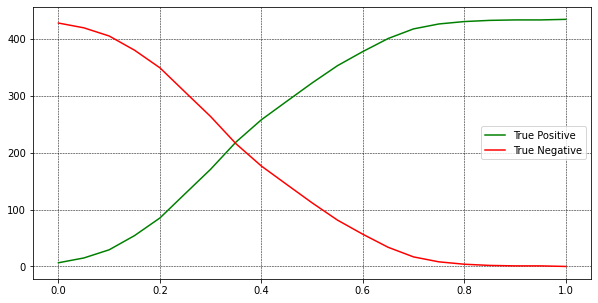

In [14]:
smsa.experiments.expected_plot(logrets_mtx, blending_params=[1], iterations=10, figsize=(10, 5))

In [15]:
thresholds = [0.2, 0.4, 0.6]

## 1. False Negative + False Positive + Risk (0.5 * P(FN) + 0.5 * P(FP))

In [16]:
def fn_fp_risk(dfs: List[pd.DataFrame], x='bp'):
    # plotting
    plot_rows = len(thresholds)
    plot_cols = 3
    tester_name = None

    fig, ax = plt.subplots(nrows=plot_rows, ncols=plot_cols, squeeze=False, figsize=(18, 12))
    for row, th in enumerate(thresholds):
        th_filtered = filter_by_threshold(dfs, th)
    
        for df in th_filtered:
            tester_name = df.iloc[0,0]
            correction_name = df.iloc[0,1]

            # plot FP
            fp = df['FP']
            ax[row][0].plot(df[x], fp, label=f'{correction_name}')
            ax[row][0].set_title(f'False Positives, th={th}', fontsize=12)
            ax[row][0].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

            # plot FN
            fn = df['FN']
            ax[row][1].plot(df[x], fn, label=f'{correction_name}')
            ax[row][1].set_title(f'False Negatives, th={th}', fontsize=12)
            ax[row][1].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

            # compute and plot risk function
            risk_fp = (df['FP'] / df['ntests'])
            risk_fn = (df['FN'] / df['ntests'])
            risk = 0.5 * risk_fp + 0.5 * risk_fn
            ax[row][2].plot(df[x], risk, label=f'{correction_name}')
            ax[row][2].set_title(f'Risk = 0.5*P(FP)+0.5*P(FN), th={th}', fontsize=12)
            ax[row][2].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

    plt.legend(loc=(1.04, 1.44), prop={'size': 12})
    plt.show()

### Pearson

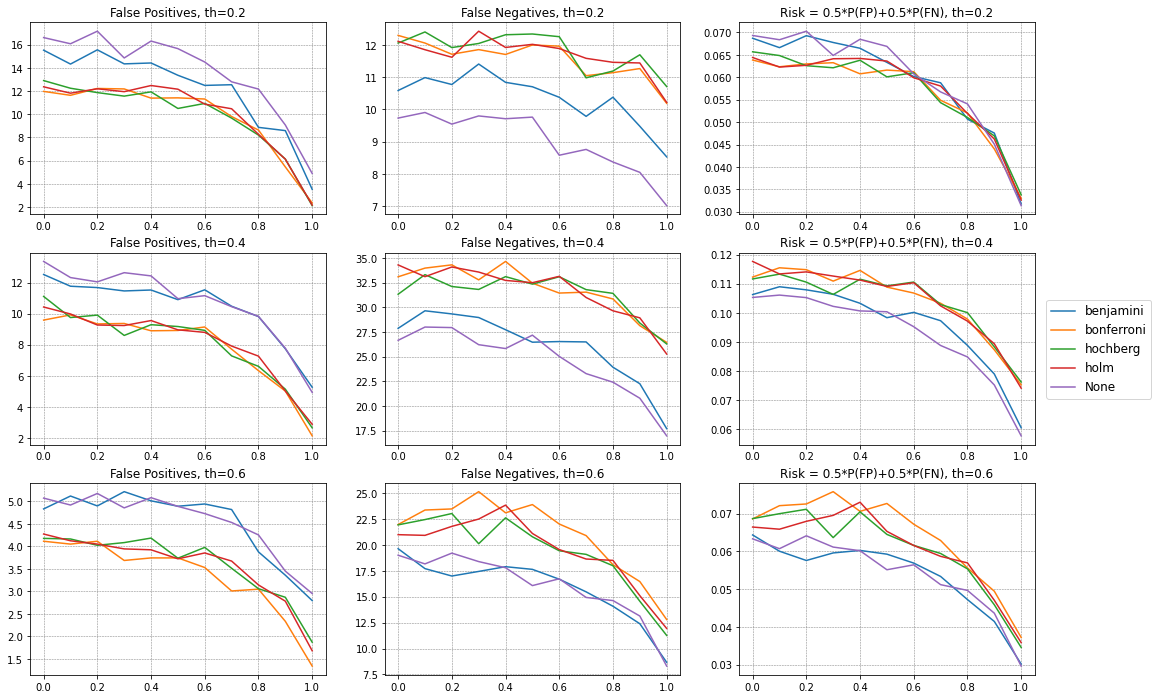

In [17]:
fn_fp_risk(pearson_dfs)

### Sign

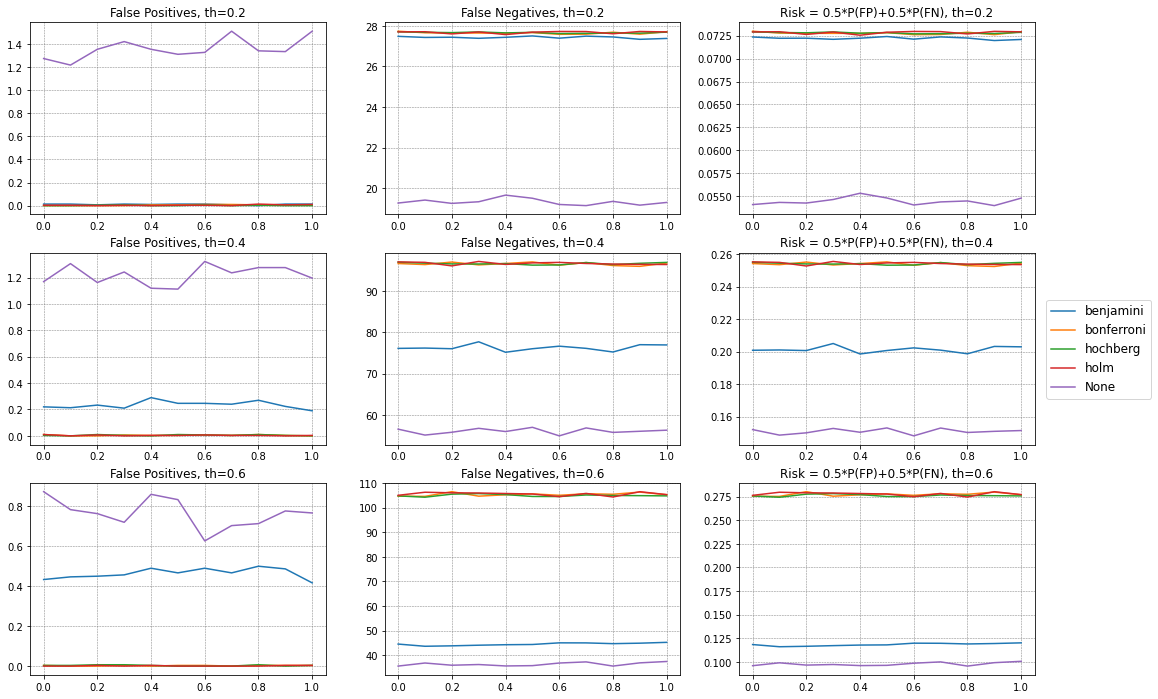

In [18]:
fn_fp_risk(sign_dfs)

### Kendall

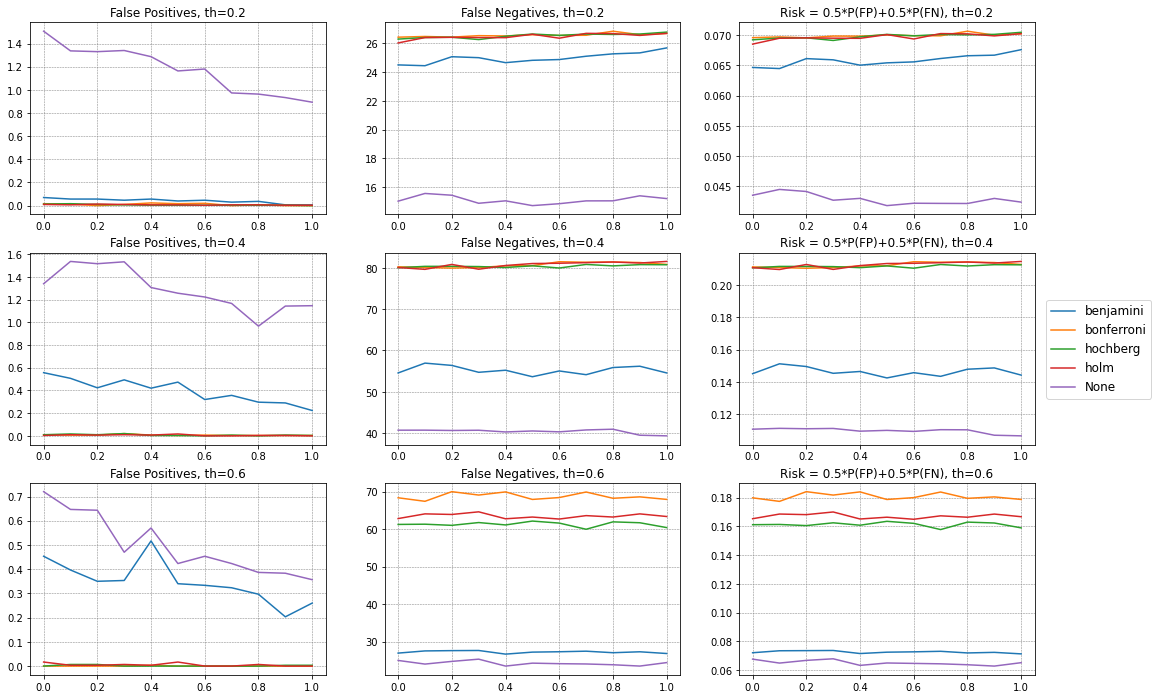

In [19]:
fn_fp_risk(kendall_dfs)

## 2. FDR, Power, Accuracy

In [20]:
def fdr_power_acc(dfs: List[pd.DataFrame], x='bp'):
    # plotting
    plot_rows = len(thresholds)
    plot_cols = 3
    tester_name = None

    fig, ax = plt.subplots(nrows=plot_rows, ncols=plot_cols, squeeze=False, figsize=(18, 12))
    for row, th in enumerate(thresholds):
        th_filtered = filter_by_threshold(dfs, th)
    
        for df in th_filtered:
            tester_name = df.iloc[0,0]
            correction_name = df.iloc[0,1]

            # compute and plot FDR function
            fdr = df['FP'] / (df['FP'] + df['TP'])
            ax[row][0].plot(df[x], fdr, label=f'{correction_name}')
            ax[row][0].set_title(f'FDR, th={th}', fontsize=12)
            ax[row][0].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

            # compute and plot Power function
            power = 1 - (df['FN'] / df['ntests'])
            ax[row][1].plot(df[x], power, label=f'{correction_name}')
            ax[row][1].set_title(f'Power, th={th}', fontsize=12)
            ax[row][1].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

            # compute and plot ACC function
            acc = (df['TP'] + df['TN']) / df['ntests']
            ax[row][2].plot(df[x], acc, label=f'{correction_name}')
            ax[row][2].set_title(f'ACC, th={th}', fontsize=12)
            ax[row][2].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

    plt.legend(loc=(1.04, 1.44), prop={'size': 12})
    plt.show()

### Pearson

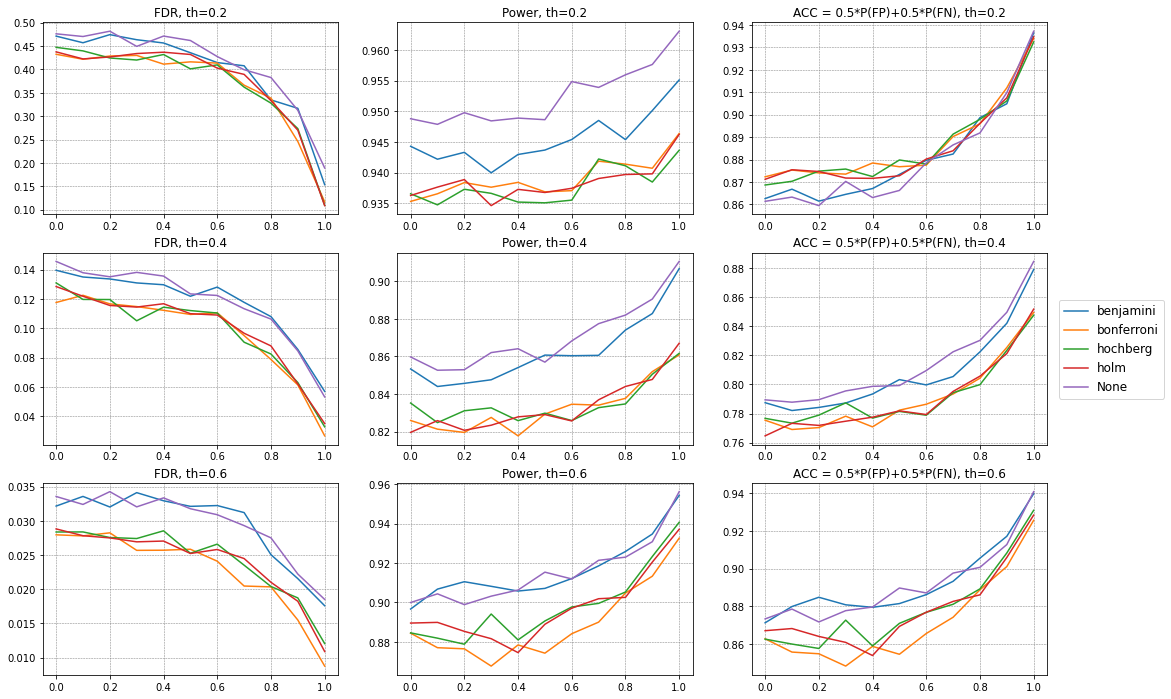

In [21]:
fdr_power_acc(pearson_dfs)

### Sign

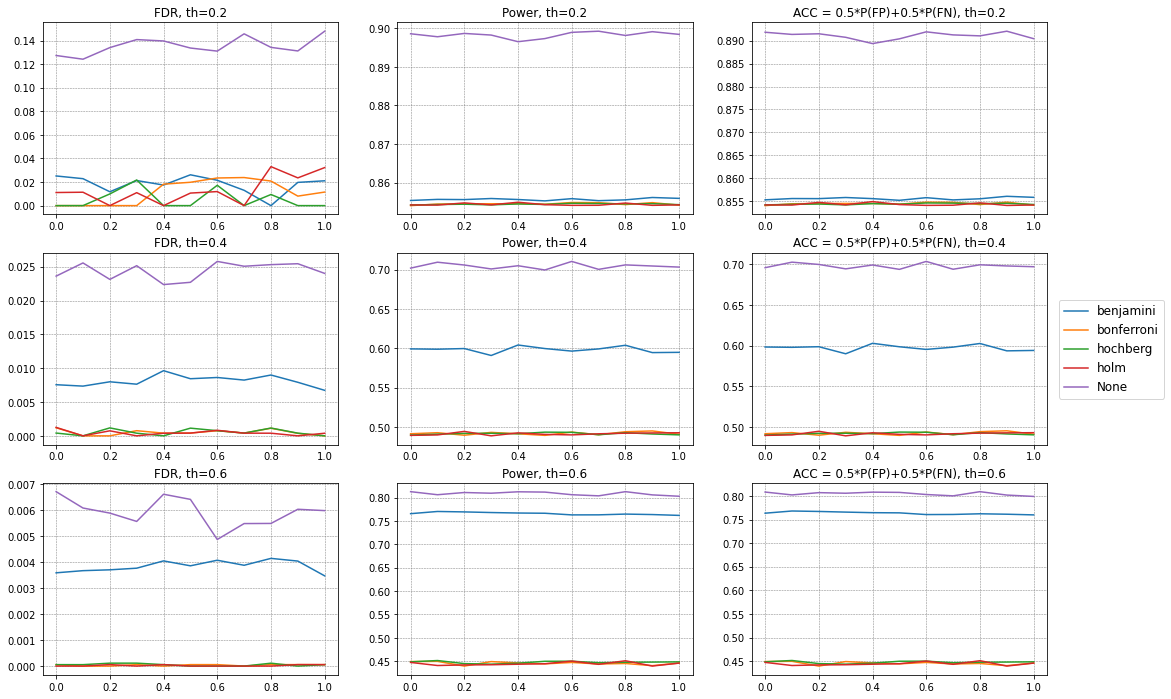

In [22]:
fdr_power_acc(sign_dfs)

### Kendall

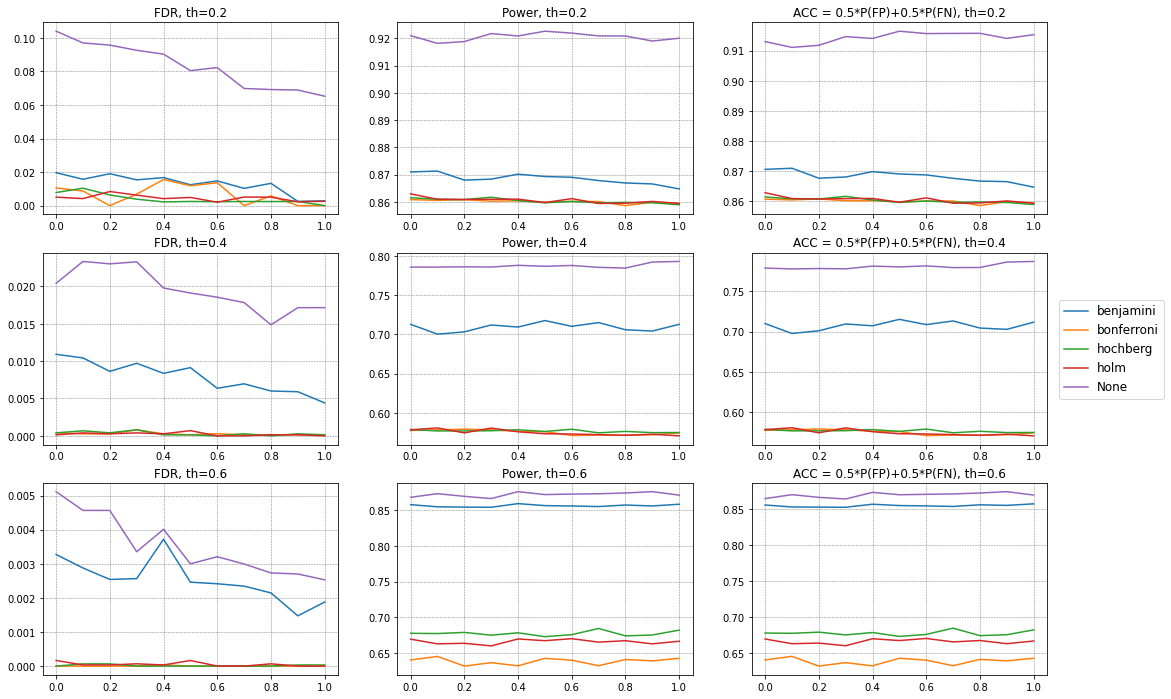

In [23]:
fdr_power_acc(kendall_dfs)

## 3. P(FP=0) for Pearson, Sign, and Kendall

In [24]:
def pfp_zero(tester_dfs=[pearson_dfs, sign_dfs, kendall_dfs], x='bp'):
    # plotting
    plot_rows = len(thresholds)
    plot_cols = 3

    fig, ax = plt.subplots(nrows=plot_rows, ncols=plot_cols, squeeze=False, figsize=(18, 12))
    for row, th in enumerate(thresholds):

        tester_names = ['Pearson', 'Sign', 'Kendall']

        for i, tester_name in enumerate(tester_names):
            th_filtered = filter_by_threshold(tester_dfs[i], th)
            for df in th_filtered:
                correction_name = df.iloc[0,1]

                # compute and plot the probability P(FP=0) function
                _pfp_zero = df['P(FP=0)']
                ax[row][i].plot(df[x], _pfp_zero, label=f'{correction_name}')
                ax[row][i].set_title(f'P(FP=0) for {tester_name}, th={th}', fontsize=12)
                ax[row][i].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

    plt.legend(loc=(1.04, 1.44), prop={'size': 12})
    plt.show()

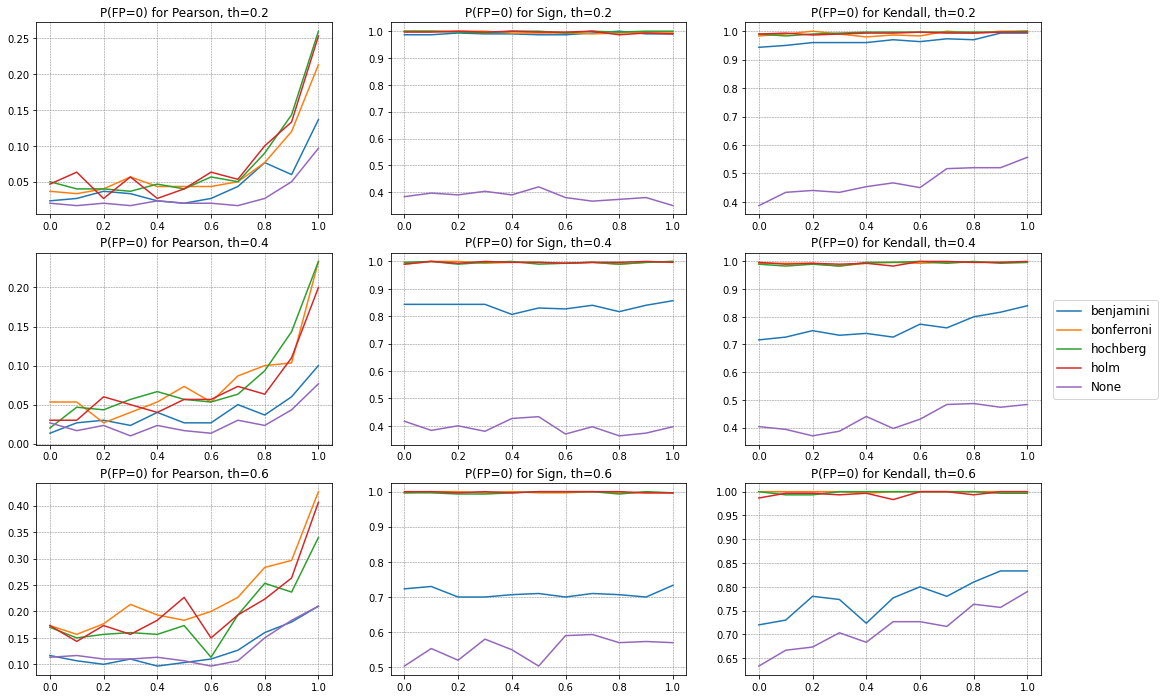

In [25]:
pfp_zero()

## 4. TN / ETN for Pearson, Sign, Kendall
ETN - Expected True Negative

In [26]:
def true_edges_plotted(tester_dfs = [pearson_dfs, sign_dfs, kendall_dfs], x='bp'):
    # plotting
    plot_rows = len(thresholds)
    plot_cols = 3

    fig, ax = plt.subplots(nrows=plot_rows, ncols=plot_cols, squeeze=False, figsize=(18, 12))
    for row, th in enumerate(thresholds):

        tester_names = ['Pearson', 'Sign', 'Kendall']

        for i, tester_name in enumerate(tester_names):
            th_filtered = filter_by_threshold(tester_dfs[i], th)
            for df in th_filtered:
                correction_name = df.iloc[0,1]

                # compute and plot the probability P(FP=0) function
                _true_edges_plotted = df['TN'] / df['EN']
                ax[row][i].plot(df[x], _true_edges_plotted, label=f'{correction_name}')
                ax[row][i].set_title(f'TN/ETN for {tester_name}, th={th}', fontsize=12)
                ax[row][i].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

    plt.legend(loc=(1.04, 1.44), prop={'size': 12})
    plt.show()

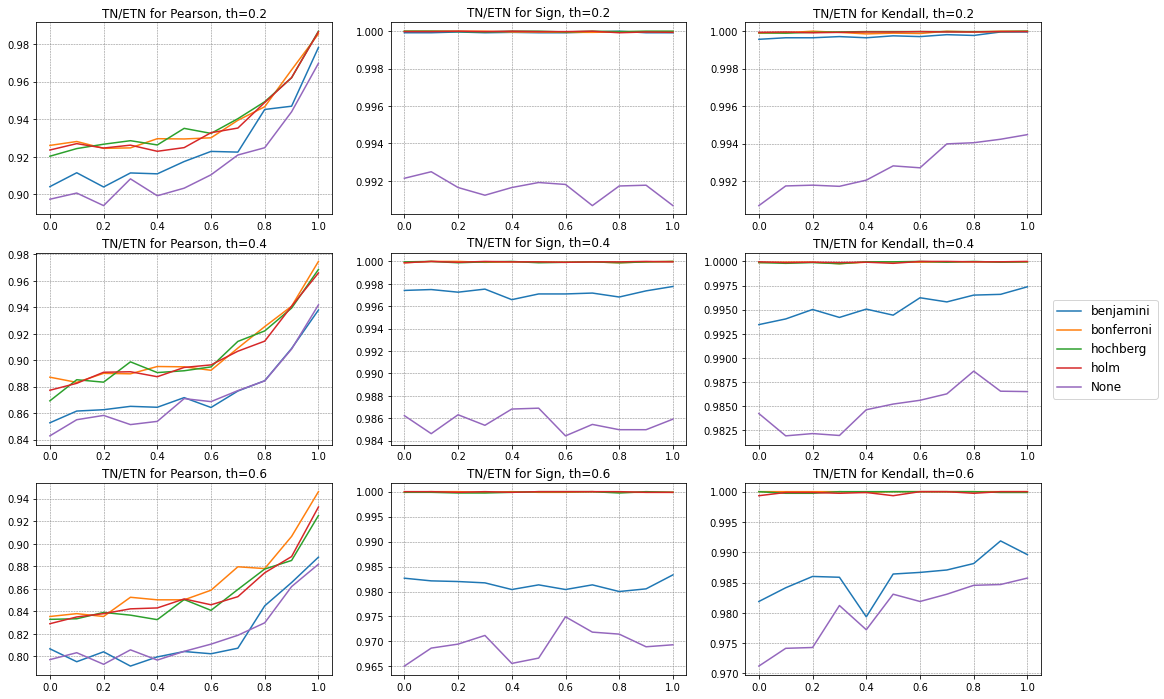

In [27]:
true_edges_plotted()

## 5. Asymptotiс: False Negative, False Positive, Risk (0.5 * P(FN) + 0.5 * P(FP)) 

### Pearson

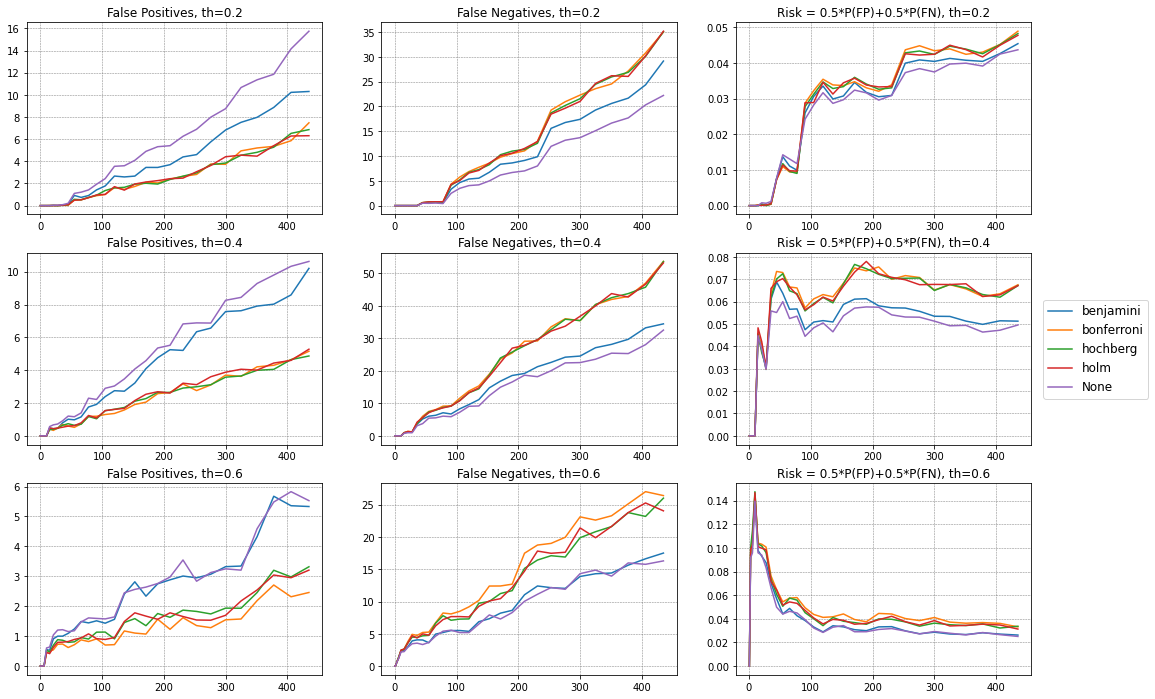

In [28]:
fn_fp_risk(asymptotic_pearson_dfs, x='ntests')

### Sign

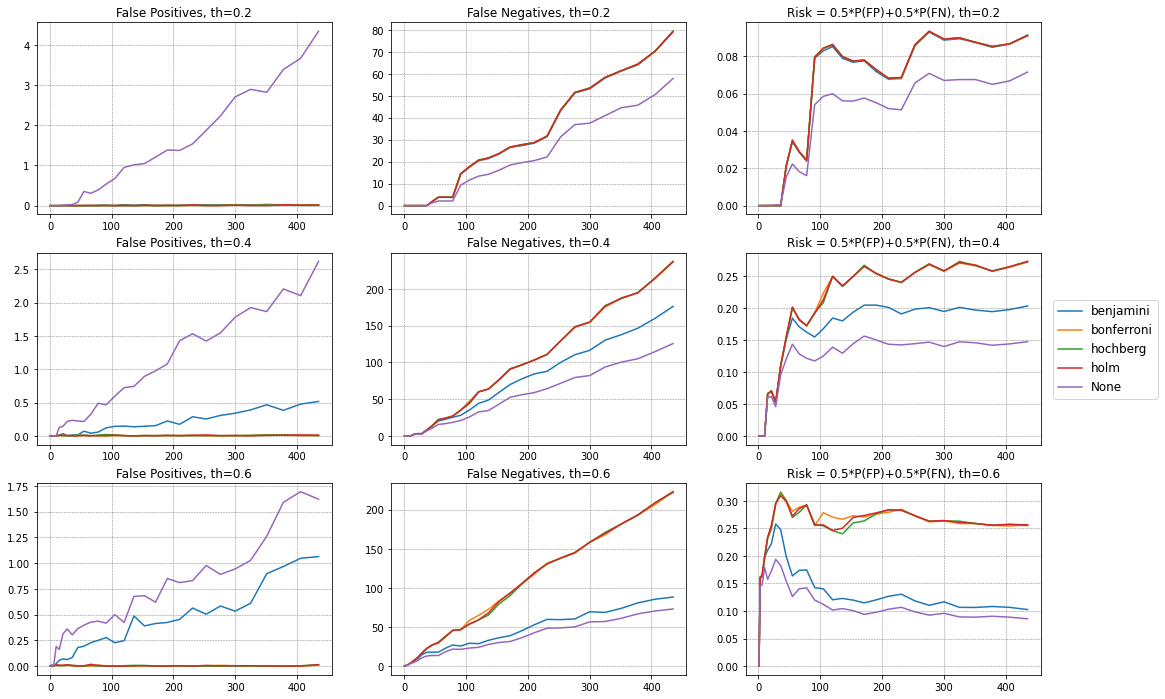

In [29]:
fn_fp_risk(asymptotic_sign_dfs, x='ntests')

### Kendall

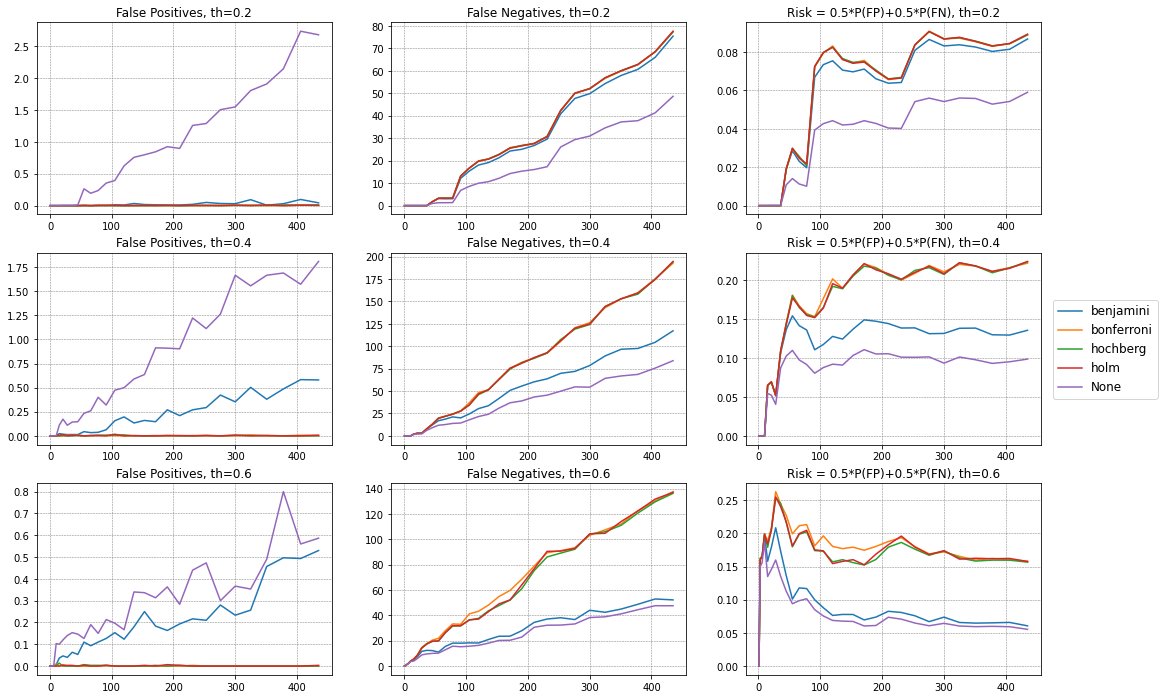

In [30]:
fn_fp_risk(asymptotic_kendall_dfs, x='ntests')

## 6. Asymptotic FDR, Power, Accuracy

### Pearson

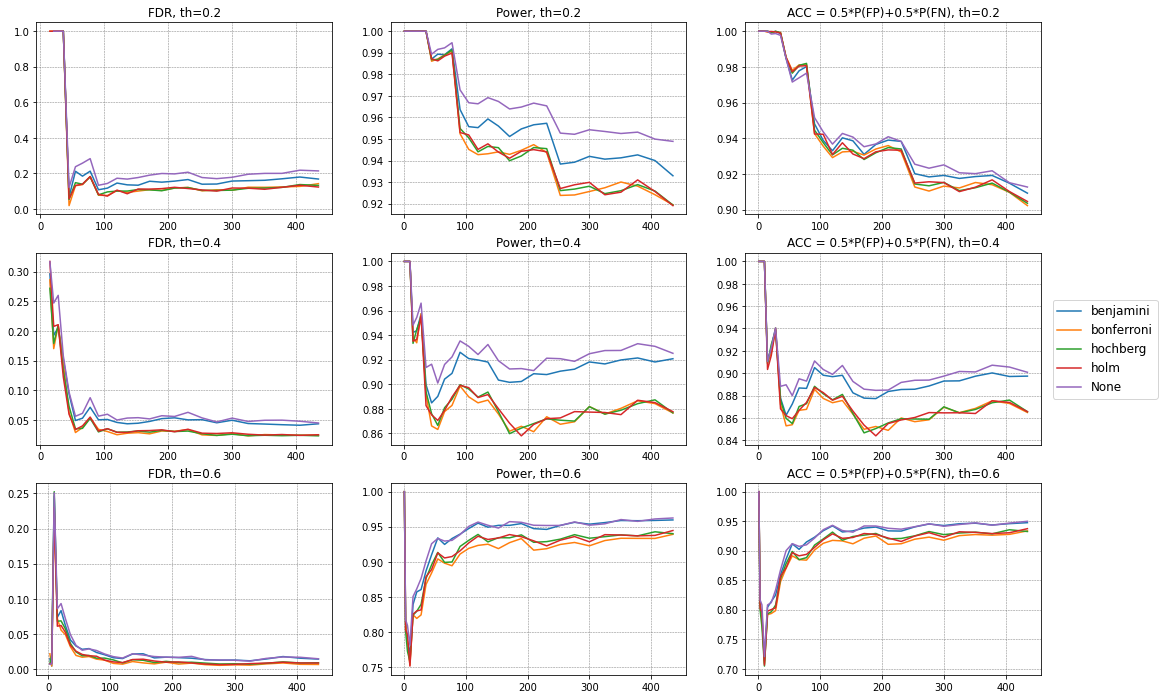

In [31]:
fdr_power_acc(asymptotic_pearson_dfs, x='ntests')

### Sign

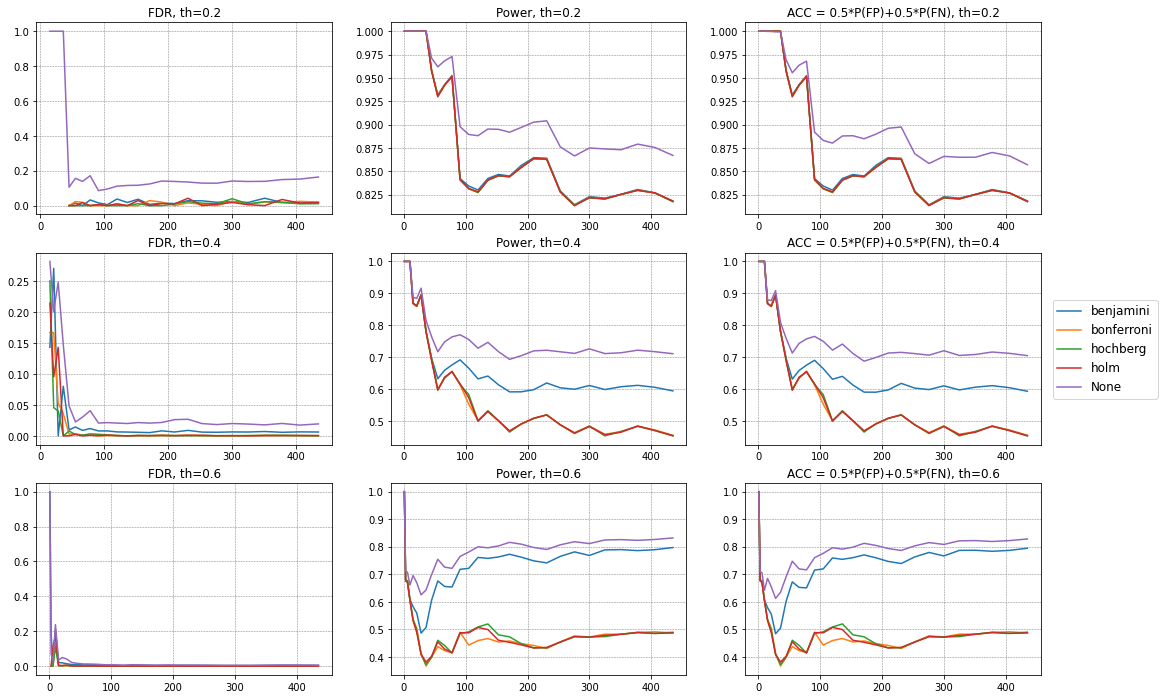

In [32]:
fdr_power_acc(asymptotic_sign_dfs, x='ntests')


### Kendall

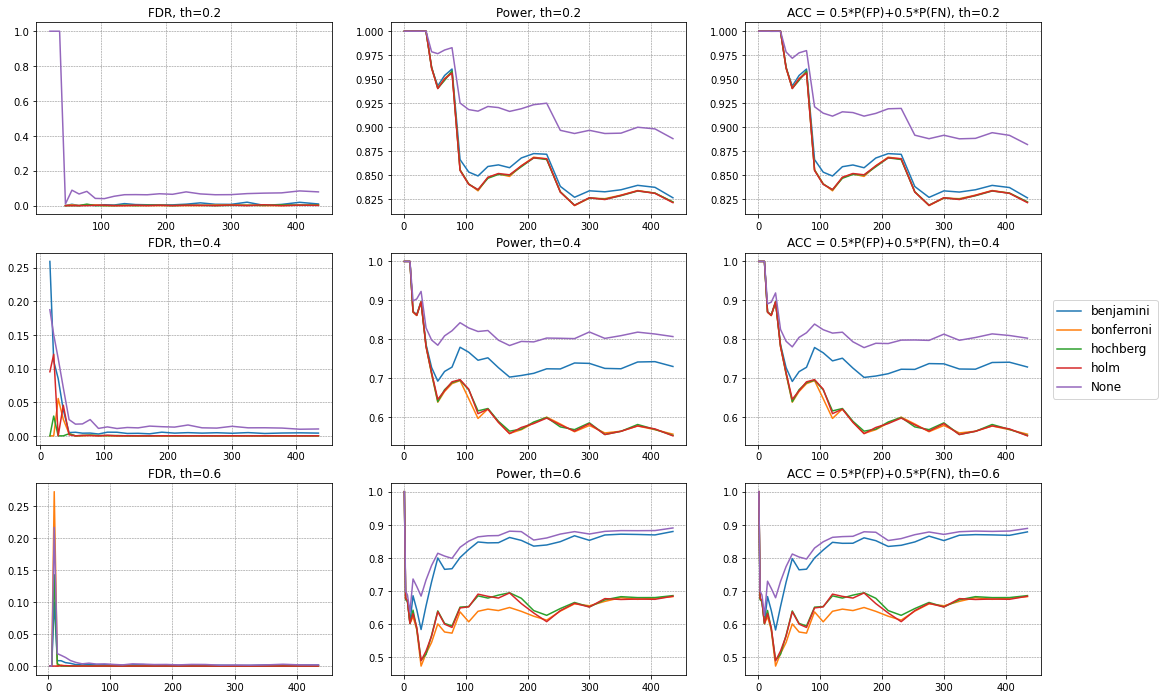

In [33]:
fdr_power_acc(asymptotic_kendall_dfs, x='ntests')

## 7. Asymptotic P(FP=0) for Pearson, Sign, and Kendall

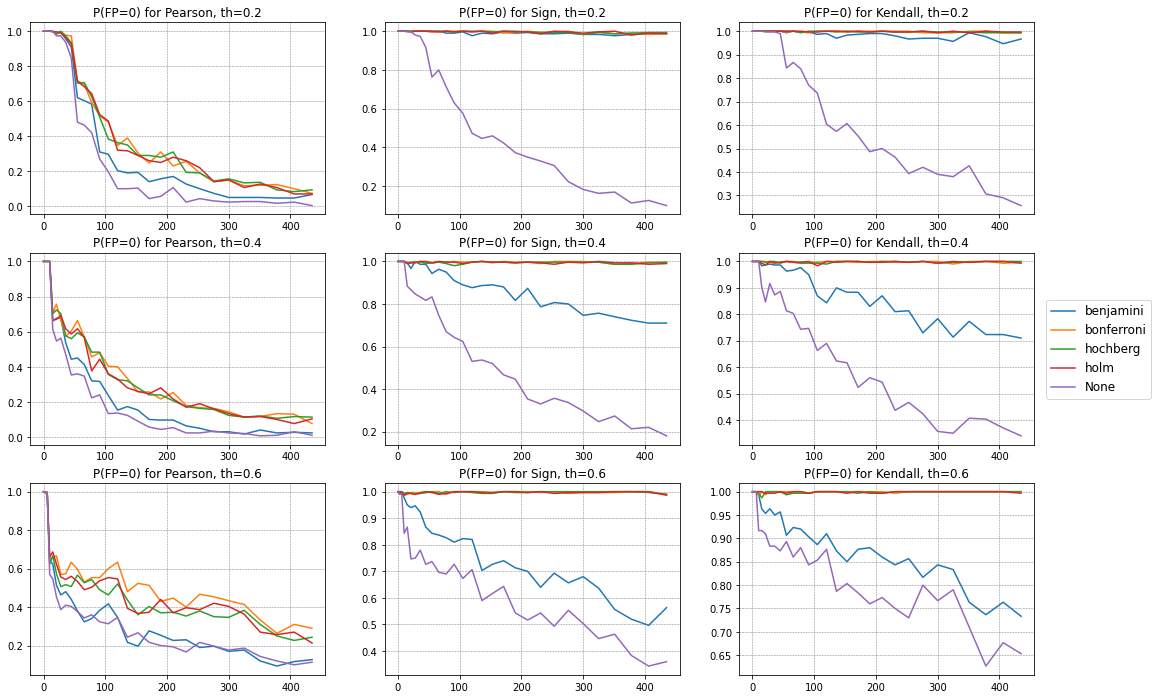

In [34]:
pfp_zero(tester_dfs=[asymptotic_pearson_dfs, asymptotic_sign_dfs, asymptotic_kendall_dfs], x='ntests')

## 8. Asymptotic TN / ETN for Pearson, Sign, Kendall
ETN - Expected True Negative

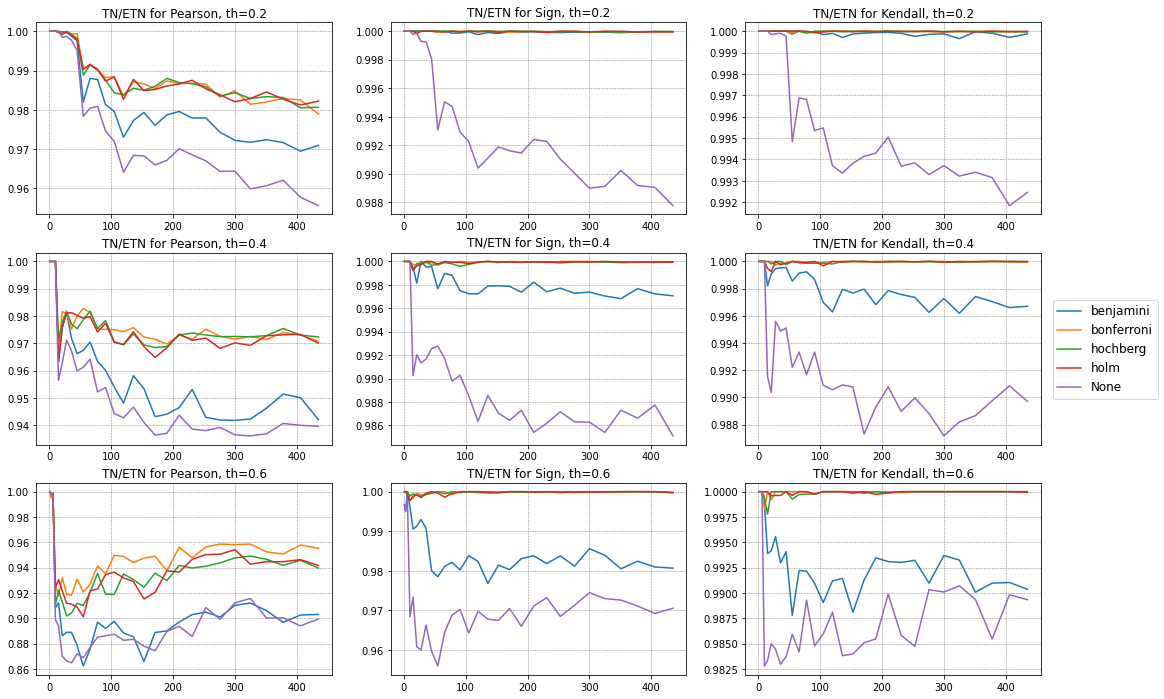

In [35]:
true_edges_plotted(tester_dfs=[asymptotic_pearson_dfs, asymptotic_sign_dfs, asymptotic_kendall_dfs], x='ntests')